## 📊 Data Exploration

In this section, we load the *Admission* dataset and explore its contents.  
We start by visualizing the distribution of several features to understand their ranges and tendencies.  
Next, we use a `pairplot` to investigate pairwise relationships between the variables.  
From this plot, we identify the pair of features that exhibits the strongest correlation, 
which can inform us about potential multicollinearity or key predictors for admission probability.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

In [30]:
# Load the dataset
df = pd.read_csv('/mnt/e/Term 3/Machin-Learning/Projects/06 pro/data/Admission.csv')

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
np.sum(df.isnull())

/home/mohammadjavad/anaconda3/envs/py312/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
pd.value_counts(df['Research'])

/tmp/ipykernel_1490/160203443.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Research'])


Research
1    219
0    181
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


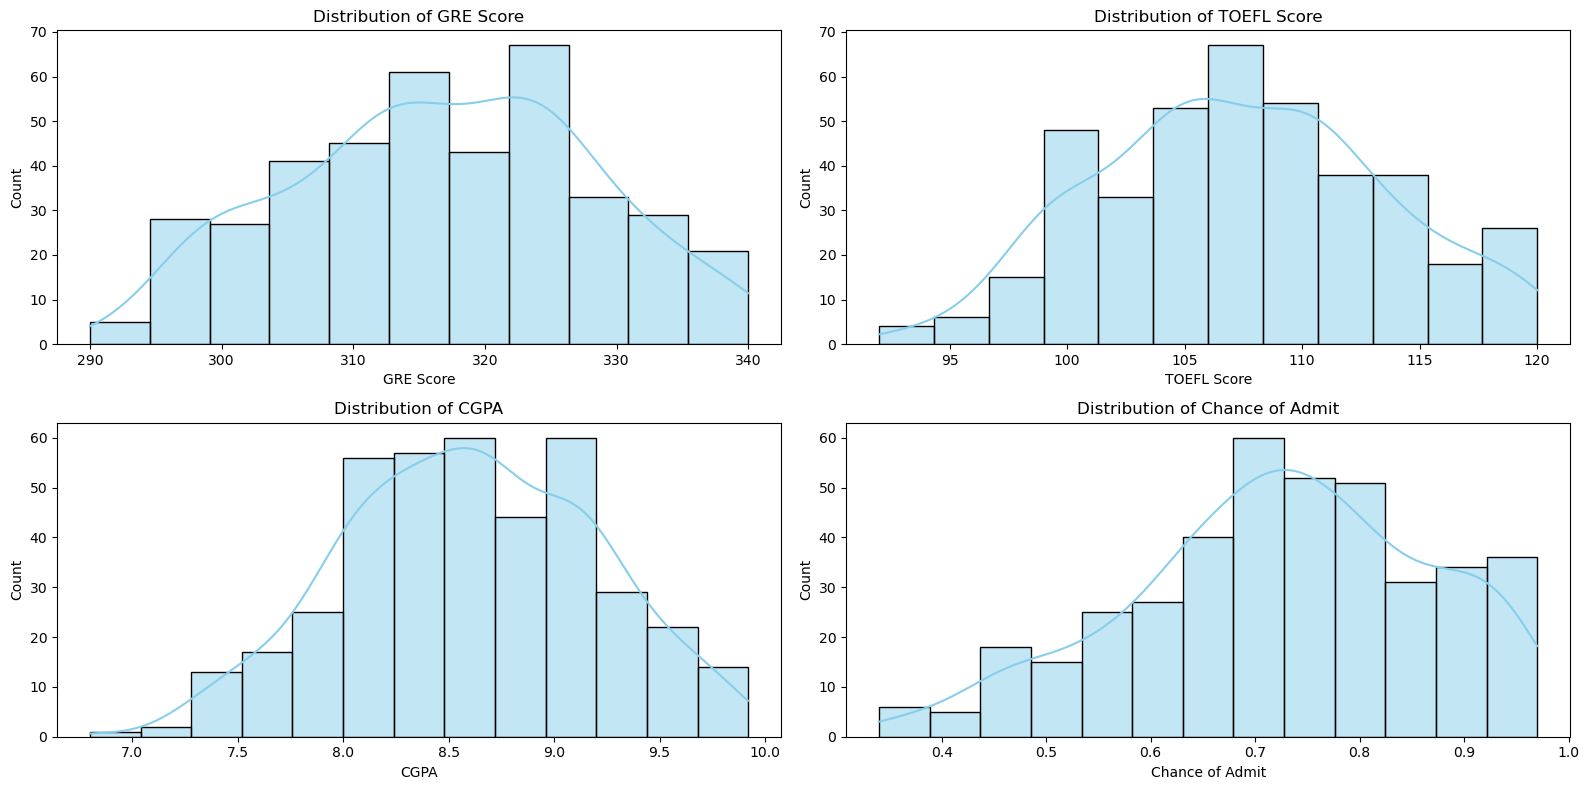

In [9]:
plt.figure(figsize=(16, 8))
features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

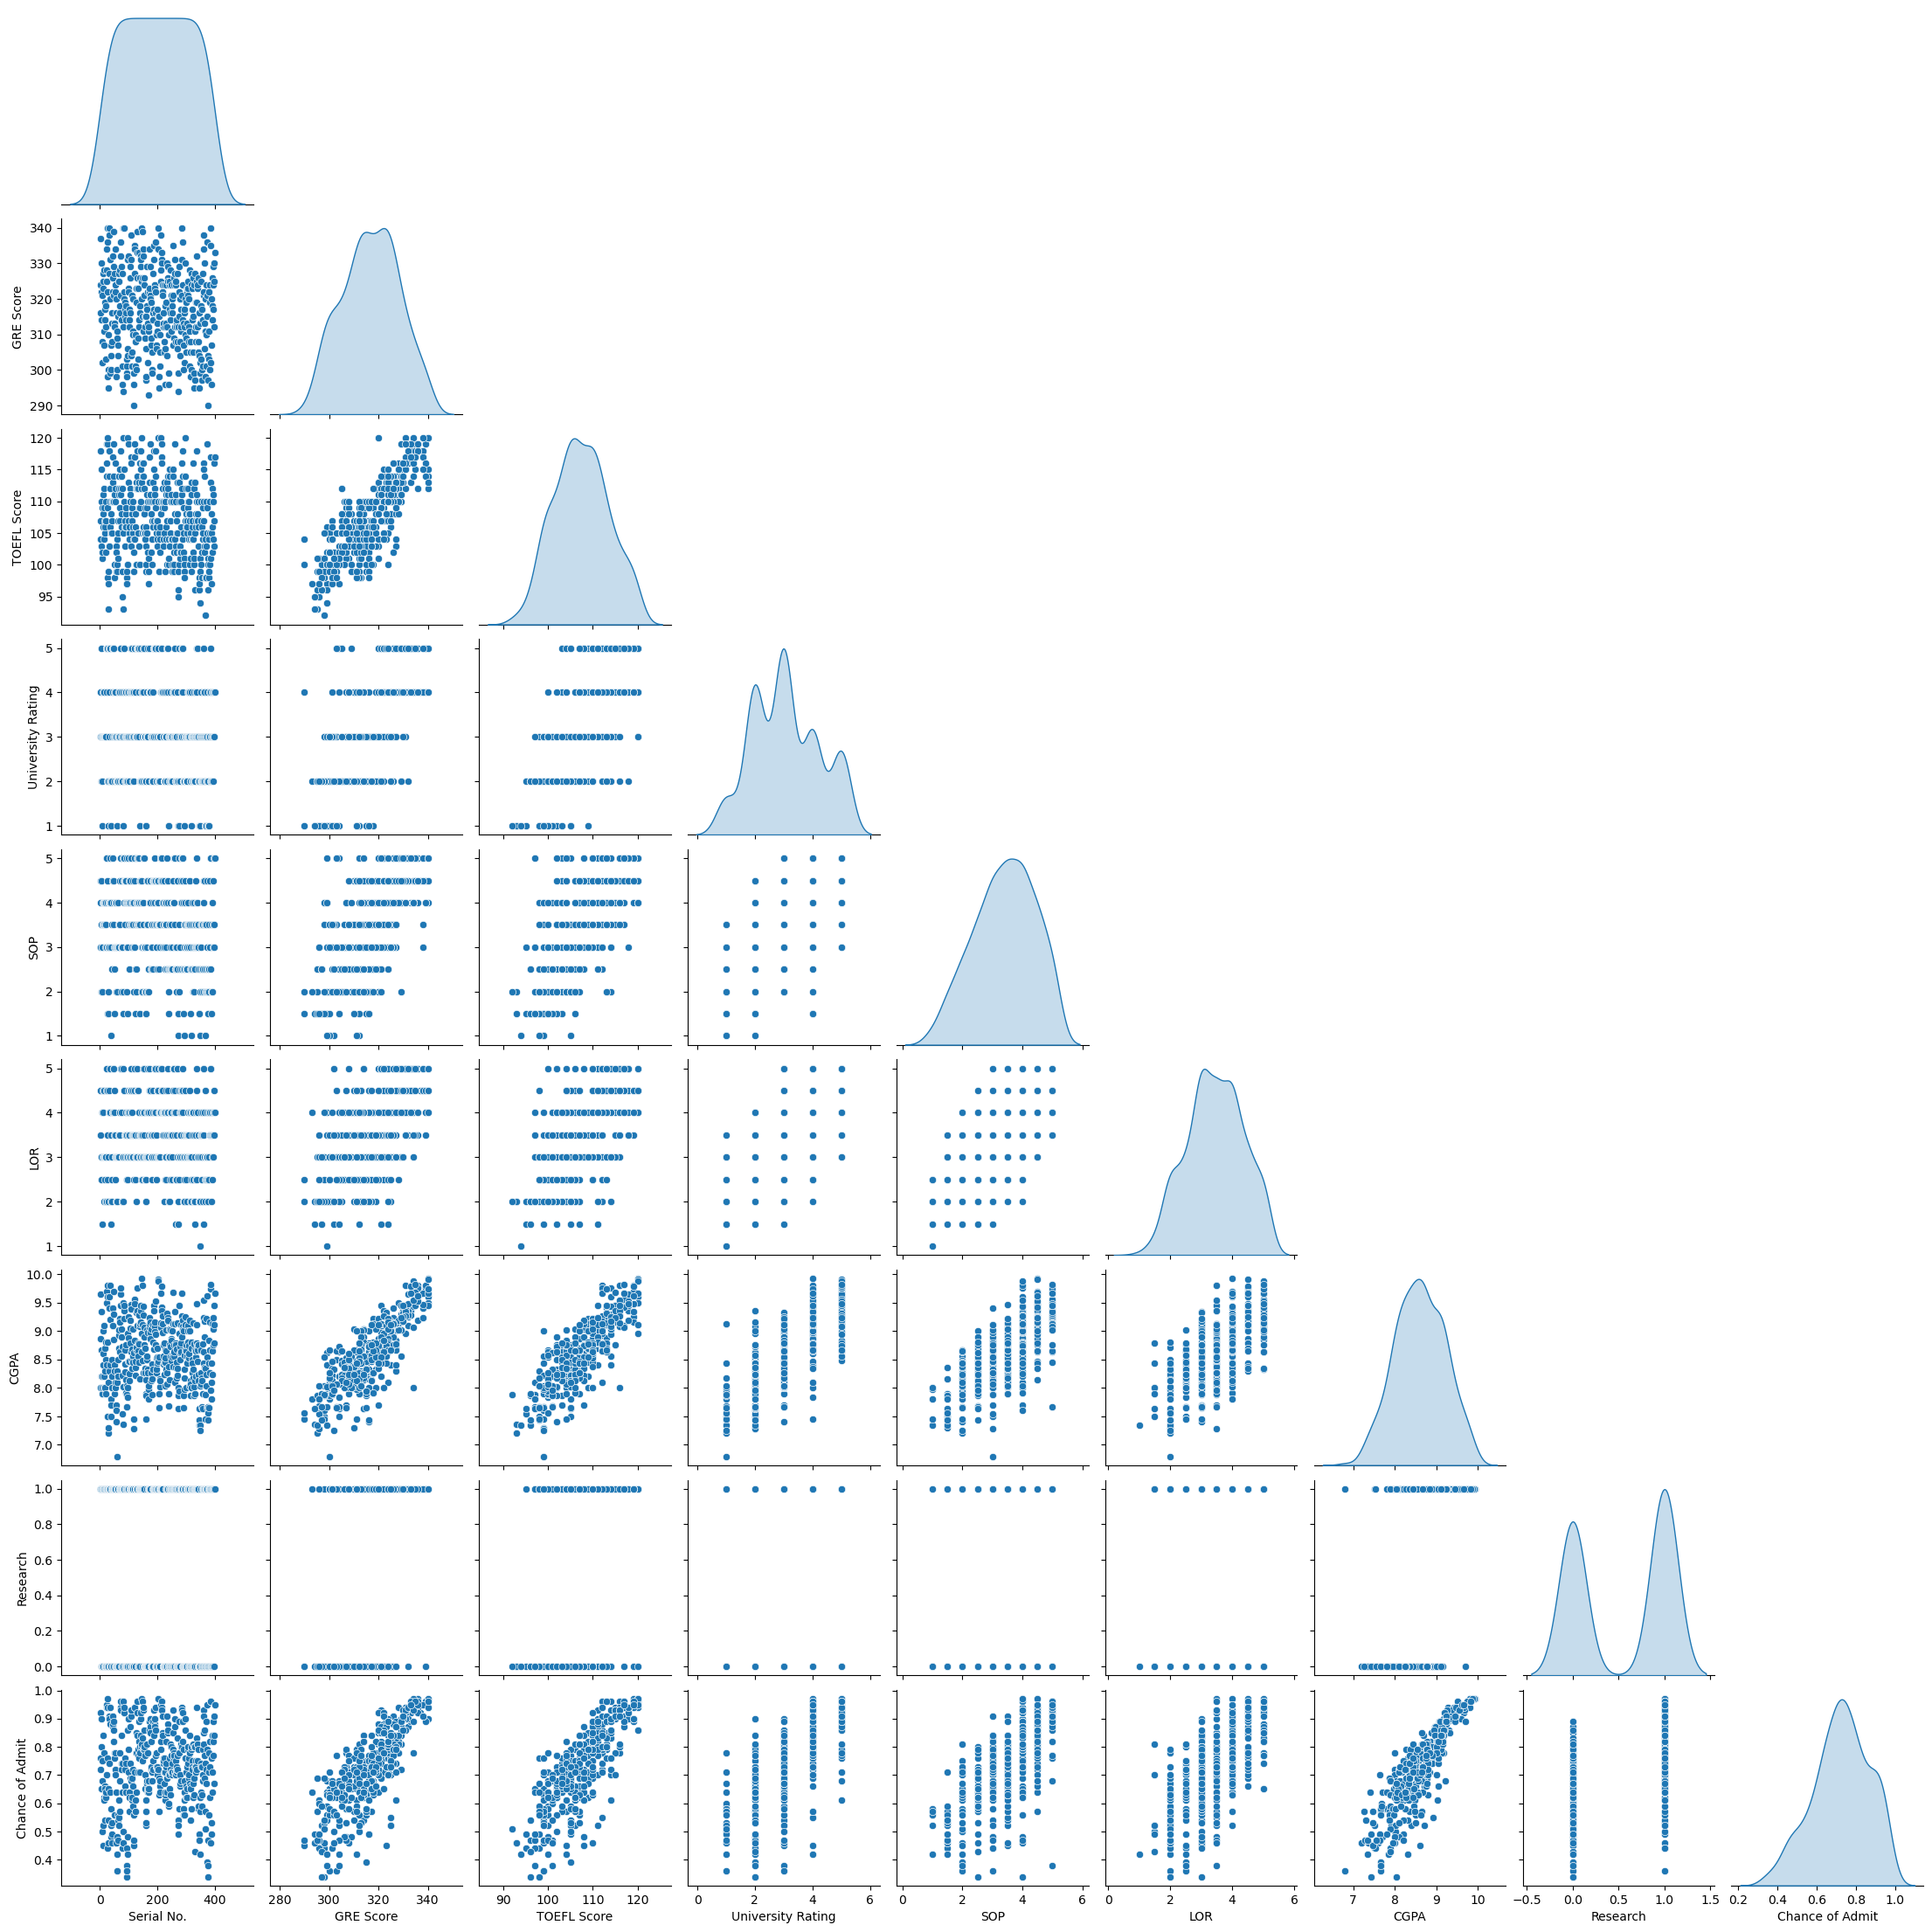

In [10]:
# Plot pairwise relationships to check correlations visually
sns.pairplot(df, corner=True, diag_kind='kde')
plt.show()

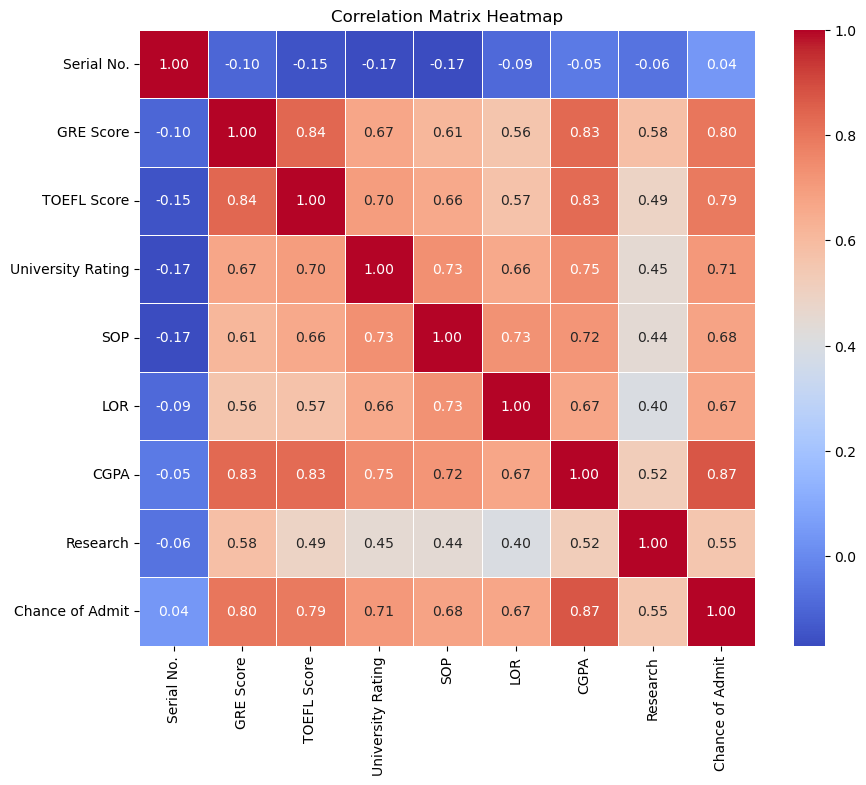

In [84]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Also plot a heatmap for a more visual view
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
corr_matrix = correlation_matrix.unstack()
sorted_corr = corr_matrix.sort_values(ascending=False)
highest_corr = sorted_corr[sorted_corr != 1.0]

unique_pairs = {}

for (feature1, feature2), value in highest_corr.items():
    key = tuple(sorted((feature1, feature2)))

    if key not in unique_pairs:
        unique_pairs[key] = value
    

unique_corr_serie = pd.Series(unique_pairs)
unique_corr_serie.head(10)

CGPA             Chance of Admit      0.873289
GRE Score        TOEFL Score          0.835977
CGPA             GRE Score            0.833060
                 TOEFL Score          0.828417
Chance of Admit  GRE Score            0.802610
                 TOEFL Score          0.791594
CGPA             University Rating    0.746479
SOP              University Rating    0.734523
LOR              SOP                  0.729593
CGPA             SOP                  0.718144
dtype: float64

In [ ]:
unique_corr_serie.tail(10)

Research         SOP                  0.444029
LOR              Research             0.396859
Chance of Admit  Serial No.           0.042336
CGPA             Serial No.          -0.045608
Research         Serial No.          -0.063138
LOR              Serial No.          -0.088221
GRE Score        Serial No.          -0.097526
Serial No.       TOEFL Score         -0.147932
SOP              Serial No.          -0.166932
Serial No.       University Rating   -0.169948
dtype: float64

## Part 1 🚀 Linear Regression with Closed-Form Solution (Normal Equation)

In this step of the project, we perform the following tasks:

- **Data Splitting:**  
  We split the dataset into training and testing sets to evaluate the model performance on unseen data.

- **Target & Features:**  
  - **Target (dependent variable):** `GRE Score`
  - **Features (independent variables):** all other columns except `GRE Score`.

- **Model Building:**  
  We implement linear regression using the **closed-form solution**, also known as the **normal equation**, given by:

  $$
  \mathbf{w} = (X^T X)^{-1} X^T y
  $$

  where:
  - \(X\) is the design matrix (features),
  - \(y\) is the target vector,
  - \(\mathbf{w}\) is the vector of regression coefficients.

- **Evaluation:**  
  We compute the **Mean Squared Error (MSE)** on both:
  - the **training set**, to assess how well the model fits the data it learned from,
  - and the **test set**, to evaluate generalization on unseen data.

This helps us understand the predictive power of the features for estimating `GRE Score` using a simple linear model.


In [12]:
X = df.drop(['GRE Score', 'Serial No.'], axis=1)
y = df['GRE Score']

In [23]:
print('Features:\n' + '-' * 20)
for column in X.columns:
    print(column)

Features:
--------------------
TOEFL Score
University Rating
SOP
LOR
CGPA
Research
Chance of Admit


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320, 7) (320,)
(80, 7) (80,)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
X_train_scaled_with_bias = np.c_[X_train_scaled, np.ones(shape=(X_train_scaled.shape[0], 1))]
X_test_scaled_with_bias = np.c_[X_test_scaled, np.ones(shape=(X_test_scaled.shape[0], 1))]

print(X_train_scaled_with_bias.shape, X_test_scaled_with_bias.shape)

(320, 8) (80, 8)


In [41]:
X_test_scaled_with_bias[:,7]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
w = np.linalg.inv(X_train_scaled_with_bias.T @ X_train_scaled_with_bias) @ X_train_scaled_with_bias.T @ y_train

In [44]:
w 

array([ 4.09314614e+00,  1.63119613e-01, -5.53352358e-01, -3.55469666e-01,
        4.09403623e+00,  1.80490750e+00,  1.78558444e+00,  3.16846875e+02])

In [68]:
columns = list(np.array(X.columns))
column_names_with_bias = columns + ['bias']

for weight in zip(column_names_with_bias, w):
    print(weight)

('TOEFL Score', 4.093146138893175)
('University Rating', 0.16311961287828147)
('SOP', -0.5533523584795486)
('LOR', -0.3554696660494088)
('CGPA', 4.0940362318730035)
('Research', 1.80490750205416)
('Chance of Admit', 1.785584443658161)
('bias', 316.846875)


## 🚀 Making Predictions and Evaluating the Model

Now that we have computed the weights (`w`) for our linear regression model, we can proceed with:

- **Prediction:**  
  Use the learned weights to predict `GRE Score` for both the training and test datasets.

  $$
  \hat{y} = X w
  $$

  where:
  - \(X\) is the design matrix (including the bias column of 1s),
  - \(w\) is the vector of learned weights,
  - \(\hat{y}\) is the predicted `GRE Score`.

- **Evaluation:**  
  Calculate the **Mean Squared Error (MSE)** on both datasets:
  - **Training MSE** to check how well the model fits the data it was trained on.
  - **Test MSE** to see how well it generalizes to new, unseen data.

  $$
  \mathrm{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$

This will give us a quantitative measure of our model's performance.


In [69]:
y_train_pred = X_train_scaled_with_bias @ w
y_test_pred = X_test_scaled_with_bias @ w

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse:.3f}')
print(f'Test MSE: {test_mse:.3f}')

Train MSE: 26.992
Test MSE: 31.945


## 📊 Model Evaluation Results

- **Training MSE:** `26.99`
- **Test MSE:** `31.95`

### 🔍 Interpretation

- The **Mean Squared Error (MSE)** on the training data is approximately **27**, indicating the average squared difference between the predicted and actual `GRE Score` is about this magnitude.

- The **Test MSE** is slightly higher at **32**, which is expected since the model encounters unseen data here.

### ✅ What does this tell us?

- The relatively close values of training and test MSE suggest that the model **generalizes reasonably well** and does **not overfit** the training data.

- However, the magnitude of MSE (≈30) should be evaluated relative to the typical range of `GRE Score` in the dataset. If GRE scores vary roughly between `290` and `340`, then an average squared error of ~30 corresponds to an RMSE (root MSE) of about `5.5`, which is quite acceptable depending on the application's tolerance.

### 🚀 Next steps

- Consider trying **regularization** (like Ridge or Lasso) or adding **polynomial features** to see if we can further reduce the test error.
- Also inspect residuals to check if there are patterns left unexplained by the linear model.



### Ridge and Lasso

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 20, 50, 100]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_['alpha'])


Best alpha: 20


In [71]:
ridge = Ridge(alpha=20)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [ ]:
param_grid = {'alpha': [0.01, 0.1,0.5, 1, 5, 10, 20, 50, 100]}

grid_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_scaled, y_train)

print("Best alpha for Lasso:", grid_lasso.best_params_['alpha'])


Best alpha for Lasso: 0.5


In [74]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [75]:
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

ridge_train_mse = mean_squared_error(y_train, ridge.predict(X_train_scaled))
lasso_train_mse = mean_squared_error(y_train, lasso.predict(X_train_scaled))


print(f"Ridge Train MSE: {ridge_train_mse:.3f}")
print(f"Ridge Test MSE: {ridge_mse:.3f}")
print(f"Lasso Train MSE: {lasso_train_mse:.3f}")
print(f"Lasso Test MSE: {lasso_mse:.3f}")

Ridge Train MSE: 27.164
Ridge Test MSE: 32.255
Lasso Train MSE: 27.607
Lasso Test MSE: 32.608


In [81]:
print('Ridge Weights:\n' + '-' * 50)
for weight in zip(X.columns, ridge.coef_):
    print(weight)

Ridge Weights:
--------------------------------------------------
('TOEFL Score', 3.7772389715122374)
('University Rating', 0.37956499795222726)
('SOP', -0.3061668598511362)
('LOR', -0.2590060629669699)
('CGPA', 3.5356672510040523)
('Research', 1.7668952802951468)
('Chance of Admit', 2.0287431839302283)


In [83]:
print('Lasso Weights:\n' + '-' * 50)
for weight in zip(X.columns, lasso.coef_):
    print(weight)

Lasso Weights:
--------------------------------------------------
('TOEFL Score', 3.902029501035487)
('University Rating', 0.0)
('SOP', 0.0)
('LOR', 0.0)
('CGPA', 3.6141013244705453)
('Research', 1.4806050939241413)
('Chance of Admit', 1.545302183601357)


## 📊 Model Comparison: Ridge vs Lasso

### ⚖️ Learned Weights

| Feature           | Ridge Weight | Lasso Weight |
|-------------------|--------------|--------------|
| TOEFL Score       | 3.78         | 3.90         |
| University Rating | 0.38         | **0.00**     |
| SOP               | -0.31        | **0.00**     |
| LOR               | -0.26        | **0.00**     |
| CGPA              | 3.54         | 3.61         |
| Research          | 1.77         | 1.48         |
| Chance of Admit   | 2.03         | 1.55         |

### 🔍 Interpretation of Weights

- **Ridge Regression:**  
  - Shrinks the weights moderately but keeps all features in the model.
  - Every feature still has a non-zero coefficient, although smaller due to regularization.

- **Lasso Regression:**  
  - Drives some weights exactly to **zero**, effectively performing **feature selection**.
  - In this case, `University Rating`, `SOP`, and `LOR` were eliminated, indicating they may not provide additional predictive power given the other features.

---

### 🏆 Model Performance

| Metric           | Ridge      | Lasso      |
|------------------|------------|------------|
| Train MSE        | **27.16**  | 27.61      |
| Test MSE         | **32.26**  | 32.61      |

### 🔬 Interpretation of Errors

- Both Ridge and Lasso achieved **similar performance** on training and test data.
- Ridge shows slightly lower MSE on both sets, indicating marginally better generalization.
- This is expected since Ridge tends to keep more features in the model, capturing more variance.

---

### 🚀 Key Takeaways

✅ **Ridge** is preferable when we suspect **all features carry some information**, and we want to reduce their impact smoothly without eliminating them.

✅ **Lasso** is useful when we believe **only a subset of features truly matter**. It helps by automatically selecting these features, which can improve interpretability.

In this case, since the test MSE values are close, either method can be justified. However, Lasso provides a **simpler model** by ignoring less informative features, which can be beneficial for interpretability.



___

___

___

## 🧪 Part 2 – Logistic Regression from Scratch

In this section, we aim to predict **university admission** as a binary outcome based on applicant features.

### Task Description:
1. **Create a new binary column named `Admission`**:
   - If the `Chance of Admit` is greater than 0.5, set `Admission = 1`, else set it to `0`.
2. **Remove the `Chance of Admit` column** and treat `Admission` as the target variable.
3. Use all remaining features as input variables.

### Modeling:
- Implement **Logistic Regression** **from scratch** (without using library functions).
- Optimize the model using the **Newton-Raphson method**.
- Evaluate the model using metrics such as:
  - **Accuracy**
  - **Confusion Matrix**
- Perform evaluation on both **training** and **testing** data.

### Analysis:
- Analyze the resulting **weights/coefficients**.
- Identify which feature has the **strongest influence** on university admission.
- Discuss whether the most influential feature aligns with the trends observed in the earlier **pairplot**.


In [31]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [25]:
X = df.drop(['Chance of Admit','Serial No.'], axis=1)
y = np.array([1 if chance >= 0.5 else 0 for chance in df['Chance of Admit']])

In [26]:
df['Admission'] = y

In [28]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1
5,6,330,115,5,4.5,3.0,9.34,1,0.90,1
6,7,321,109,3,3.0,4.0,8.20,1,0.75,1
7,8,308,101,2,3.0,4.0,7.90,0,0.68,1
8,9,302,102,1,2.0,1.5,8.00,0,0.50,1
9,10,323,108,3,3.5,3.0,8.60,0,0.45,0


In [32]:
X.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320, 7) (320,)
(80, 7) (80,)


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled_with_bias = np.c_[X_train_scaled, np.ones(shape=(X_train_scaled.shape[0], 1))]
X_test_scaled_with_bias = np.c_[X_test_scaled, np.ones(shape=(X_test_scaled.shape[0], 1))]
print(X_train_scaled_with_bias.shape, X_test_scaled_with_bias.shape)

(320, 8) (80, 8)


# 📘 Logistic Regression – Newton-Raphson Derivation

## ✅ Step 1: Logistic Regression Model

We model the probability of class 1 as:

$$
\hat{y}^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}} \quad \text{where} \quad z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)}
$$

- $\hat{y}^{(i)}$: predicted probability for sample $i$  
- $\mathbf{x}^{(i)}$: feature vector of sample $i$  
- $\mathbf{w}$: weight vector (parameters)



## ✅ Step 2: Log-Likelihood Function

The Bernoulli likelihood for one sample is:

$$
P(y^{(i)}|\mathbf{x}^{(i)}; \mathbf{w}) = \left( \hat{y}^{(i)} \right)^{y^{(i)}} \left( 1 - \hat{y}^{(i)} \right)^{1 - y^{(i)}}
$$

Total log-likelihood over all $n$ samples:

$$
\ell(\mathbf{w}) = \sum_{i=1}^{n} \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$



## ✅ Step 3: Gradient and Hessian

Let:
- $X \in \mathbb{R}^{n \times d}$: data matrix  
- $\mathbf{y} \in \mathbb{R}^n$: labels  
- $\hat{\mathbf{y}} = \sigma(X \mathbf{w})$: predictions



### 🔹 3.1 Gradient

$$
\nabla \ell(\mathbf{w}) = X^T (\mathbf{y} - \hat{\mathbf{y}})
$$



### 🔹 3.2 Hessian

$$
H = -X^T D X \quad \text{where} \quad D = \text{diag} \left( \hat{y}^{(i)} (1 - \hat{y}^{(i)}) \right)
$$

- $D$ is a diagonal matrix  
- The Hessian is negative definite ⇒ log-likelihood is concave



### 🔹 3.3 Newton-Raphson Update

We update weights using:

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} + (X^T D X)^{-1} X^T (\mathbf{y} - \hat{\mathbf{y}})
$$



## ✅ Summary Table

| Step | Description |
|------|-------------|
| **1. Model** | $\hat{y} = \sigma(\mathbf{w}^T \mathbf{x})$ |
| **2. Objective** | Maximize log-likelihood $\ell(\mathbf{w})$ |
| **3. Gradient** | $\nabla \ell = X^T (y - \hat{y})$ |
| **4. Hessian** | $H = -X^T D X$ |
| **5. Update Rule** | $\mathbf{w} \leftarrow \mathbf{w} + H^{-1} \nabla \ell$ |

---


In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
class LogisticRegressionNewton:
    def __init__(self, n_iter=100, tol=1e-6):
        self.n_iter = n_iter
        self.tol = tol
    
    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.weights = np.zeros(self.n_features)

        for _ in range(self.n_iter):
            z = np.dot(X, self.weights)
            predictions = sigmoid(z)

            gradient = np.dot(X.T, y - predictions)

            D = np.diag(predictions * (1 - predictions))
            hessian = np.dot(X.T, np.dot(D, X))

            delta = np.linalg.solve(hessian, gradient)
            self.weights += delta

            if np.linalg.norm(delta) < self.tol:
                break


    def predict_prob(self, X_test):
        return sigmoid(np.dot(X_test, self.weights))


    def predict(self, X_test):
        return (self.predict_prob(X_test) >= 0.5).astype(int)